<a href="https://colab.research.google.com/github/CalculatedContent/WeightWatcher/blob/master/examples/WW-VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How to make custom plots
   
   Here, we create a custom title for for the VGG16 FC3 layer plots

In [1]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
import sys
if 'google.colab' in sys.modules:
    !pip install weightwatcher

In [3]:
import numpy as np
import pandas as pd

from tqdm import tqdm

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Import WeightWatcher

set custom Logging at WARN Level

In [4]:
import weightwatcher as ww
import torchvision
import torchvision.models as models


import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(ww.__name__)
logger.setLevel(logging.INFO) 


ww.__version__,  torchvision.__version__

('0.6.0', '0.13.1')

In [5]:

vgg16 = models.vgg16(weights="IMAGENET1K_V1")

In [6]:
#%%capture

import warnings
warnings.filterwarnings('ignore')


watcher = ww.WeightWatcher(model=vgg16) 
watcher.describe()
    

INFO:weightwatcher:

python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
tensforflow version 2.6.5
keras       version 2.6.0
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': None, 'fit': 'power_law', 'sparsify': True, 'detX': True, 'mp_fit': False, 'min_evals': 0, 'max_evals': None, 'tolerance': 1e-06, 'glorot_fit': False, 'layers': [], 'layer_ids_start': 0}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': No

,layer_id,name,M,N,layer_type,num_evals,rf
0,2,Conv2d,3.0,64.0,LAYER_TYPE.CONV2D,27.0,9.0
0,4,Conv2d,64.0,64.0,LAYER_TYPE.CONV2D,576.0,9.0
0,7,Conv2d,64.0,128.0,LAYER_TYPE.CONV2D,576.0,9.0
0,9,Conv2d,128.0,128.0,LAYER_TYPE.CONV2D,1152.0,9.0
0,12,Conv2d,128.0,256.0,LAYER_TYPE.CONV2D,1152.0,9.0
0,14,Conv2d,256.0,256.0,LAYER_TYPE.CONV2D,2304.0,9.0
0,16,Conv2d,256.0,256.0,LAYER_TYPE.CONV2D,2304.0,9.0
0,19,Conv2d,256.0,512.0,LAYER_TYPE.CONV2D,2304.0,9.0
0,21,Conv2d,512.0,512.0,LAYER_TYPE.CONV2D,4608.0,9.0
0,23,Conv2d,512.0,512.0,LAYER_TYPE.CONV2D,4608.0,9.0


In [7]:
FC3_ESD = watcher.get_ESD(layer=41)

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': None, 'fit': 'power_law', 'sparsify': True, 'detX': True, 'mp_fit': False, 'min_evals': 0, 'max_evals': None, 'tolerance': 1e-06, 'glorot_fit': False, 'layers': [], 'layer_ids_start': 0}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': None, 'fit': 'power_law', 'sparsify': True

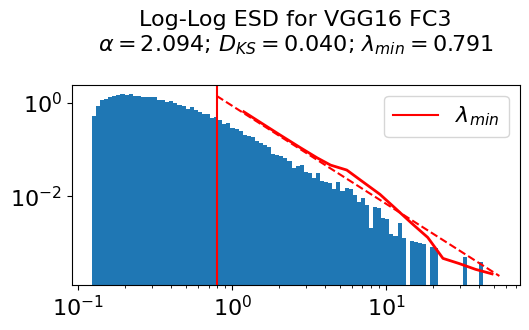

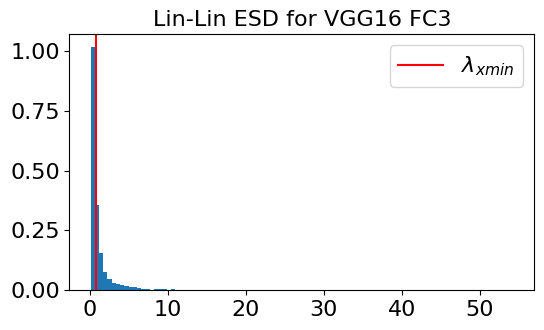

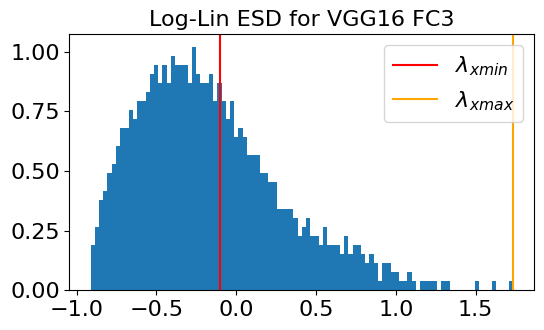

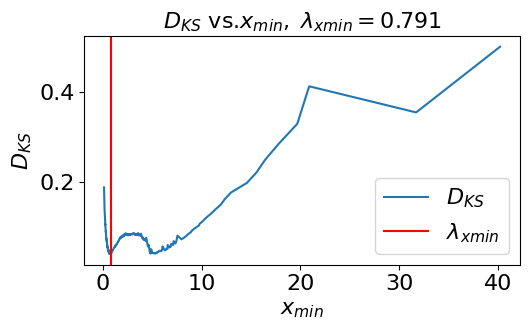

(2.093936931081225,
 -1,
 0.7907165400083561,
 54.25059667313672,
 0.04002993932075111,
 0.05575218845354416,
 385,
 'power_law',
 'success')

<Figure size 600x400 with 0 Axes>

In [8]:
SMALL_SIZE = 10
MEDIUM_SIZE = 16
LARGE_SIZE =30

plt.rc('font', size=LARGE_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

plt.rcParams['figure.figsize'] = [6,4]

# layer_id = 0
watcher.fit_powerlaw(FC3_ESD[FC3_ESD>0.1], layer_name="VGG16 FC3", layer_id = "VGG16_FC3")

In [9]:
ls ww-img/

ww.layerVGG16_FC3.esd.png   ww.layerVGG16_FC3.esd3.png
ww.layerVGG16_FC3.esd2.png  ww.layerVGG16_FC3.esd4.png


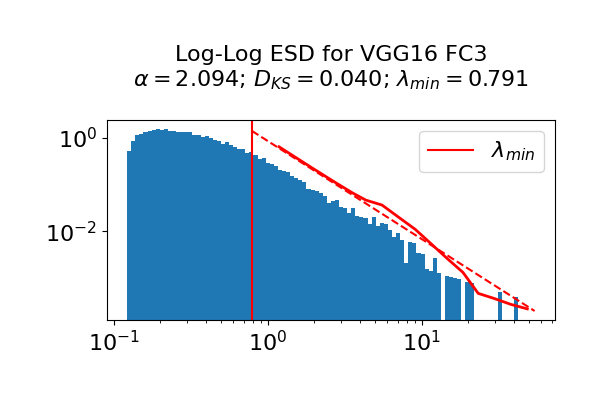

In [11]:
from IPython.display import Image
Image(filename="ww-img/ww.layerVGG16_FC3.esd.png")